In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 36.4 MB/s 
     |████████████████████████████████| 15.7 MB 43.5 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=eccdb92e5070e4d638de016d13dc0d4e15bafcf84d4dad5858af1767f438f20a
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

In [ ]:
import pandas as pd
from IPython.display import display
import numpy as np
import seaborn as sns;sns.set(style="white")
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer
stemmer = SnowballStemmer("english")
from collections import Counter


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import pyLDAvis.sklearn

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

from textblob import TextBlob
import copy

import warnings
warnings.simplefilter("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
df = pd.read_csv("go_emotions_dataset.csv")

print("Our orignal data-set have {} rows and {} columns. \n" .format(df.shape[0], df.shape[1]))

df.head(1)

Our orignal data-set have 211225 rows and 31 columns. 



id             text  example_very_unclear  ...  sadness  surprise  neutral
0  eew5j0j  That game hurt.                 False  ...        1         0        0

[1 rows x 31 columns]

In [ ]:
df["emotion"] =  df.loc[:, 'admiration':"neutral"].idxmax(axis=1)
df["text"] = df["text"].str.replace("name", "")
df.head()

id  ...     emotion
0  eew5j0j  ...     sadness
1  eemcysk  ...  admiration
2  ed2mah1  ...     neutral
3  eeibobj  ...        love
4  eda6yn6  ...     neutral

[5 rows x 32 columns]

In [ ]:
# df = df[df["example_very_unclear"]==True]

# print("Our orignal data-set have {} rows and {} columns. \n" .format(df.shape[0], df.shape[1]))

# df.head(1)

## Data Exploration:

In [ ]:
# for i in df.loc[:, 'admiration':"neutral"].columns.tolist():
#   print("'{}' has {} unique values.".format(i,len(df[i].unique())))
#   display(pd.DataFrame(df[i].value_counts()))
#   print()

#   plt.figure(figsize=(20,5))
#   sns.countplot(y = i , data = df, palette="Set1")
#   plt.title(i.upper())
#   plt.show()


'emotion' has 28 unique values.


emotion
neutral           55298
admiration        20542
approval          15530
annoyance         11929
disapproval        8917
amusement          8862
gratitude          8437
anger              7956
curiosity          7707
disappointment     6769
confusion          6600
love               5310
caring             5147
realization        5125
joy                5120
optimism           4994
excitement         4375
sadness            3863
surprise           3472
disgust            3420
desire             3002
fear               2514
embarrassment      1720
remorse            1648
nervousness         946
relief              814
pride               714
grief               494

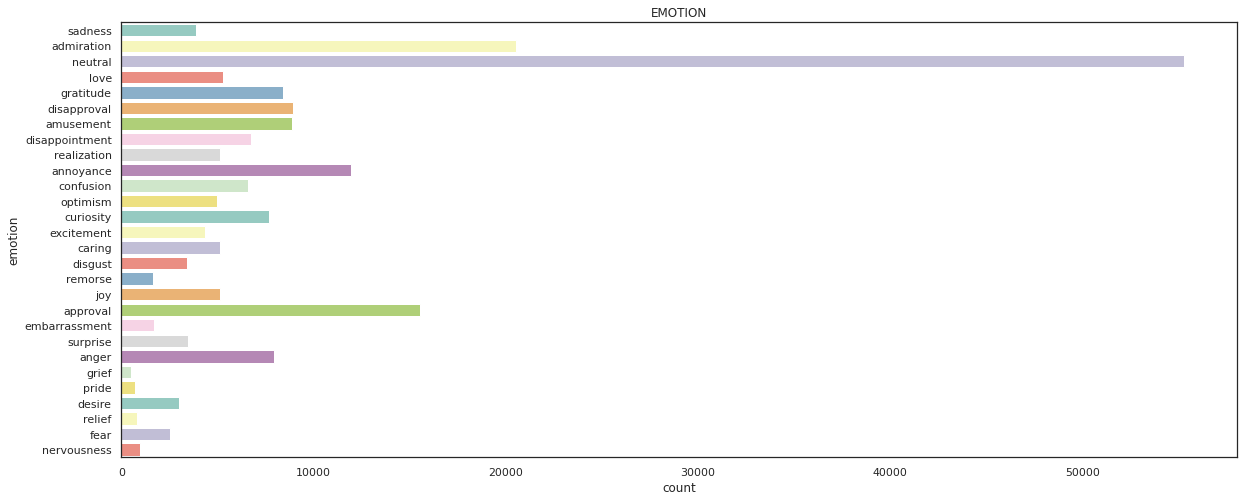

In [ ]:
print("'{}' has {} unique values.".format("emotion",len(df["emotion"].unique())))
display(pd.DataFrame(df["emotion"].value_counts()))
print()

plt.figure(figsize=(20,8))
sns.countplot(y = "emotion" , data = df, palette="Set3")
plt.title("emotion".upper())
plt.show()

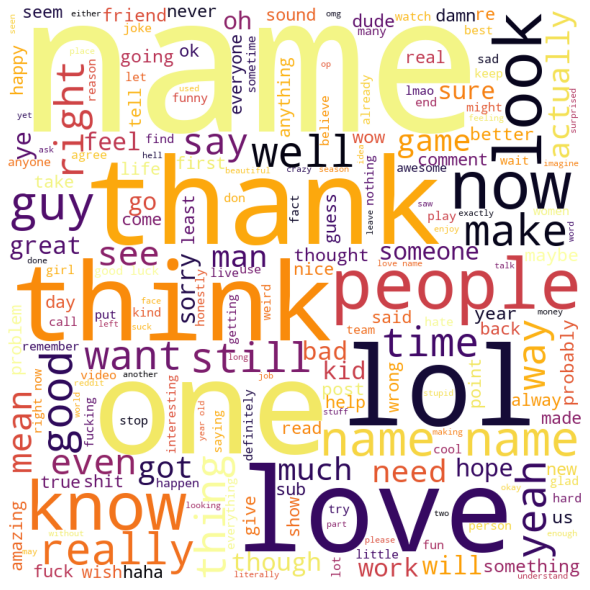

In [ ]:
from wordcloud import WordCloud, STOPWORDS


comment_words = ''
stopwords = set(STOPWORDS)

for val in df["text"]:
  # typecaste each val to string
  val = str(val)

  # split the value
  tokens = val.split()
    
  # Converts each token into lowercase
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
    
  comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                colormap="inferno").generate(comment_words)
  

# plot the WordCloud image                       
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## Data Cleaning:

In [ ]:
def cleaning(text):
  text = text.lower()
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'[0-9]', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\s{2,}', '', text)
  sequence = re.compile(r'\b(' + r'|'.join(stopwords) + r')\b\s*')
  text = sequence.sub('', text)
  return(text)

df["text"] = df["text"].apply(lambda x: cleaning(x))
df["text"] = df["text"].str.replace("name", "")

df[["text"]].head()

text
0                                          game hurt
1   sexuality shouldn’t grouping category makes d...
2                            right dont care fuck em
3                                    man love reddit
4                               nowhere near falcon

In [ ]:
# comment_words = ''
  

# for unique_key in df["emotion"].unique().tolist():
#   print()
#   print("emotion: {}\n".format(unique_key))
#   for val in df[df["emotion"]==unique_key]["text"]:
#     # typecaste each val to string
#     val = str(val)

#     # split the value
#     tokens = val.split()
      
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#       tokens[i] = tokens[i].lower()
      
#     comment_words += " ".join(tokens)+" "
    
#   wordcloud = WordCloud(width = 800, height = 800,
#                   background_color ='white',
#                   stopwords = stopwords,
#                   min_font_size = 10,
#                   colormap="coolwarm").generate(comment_words)
    

#   # plot the WordCloud image                       
#   plt.figure(figsize = (8, 8))
#   plt.imshow(wordcloud)
#   plt.axis("off")
#   plt.tight_layout(pad = 0)
    
#   plt.show()

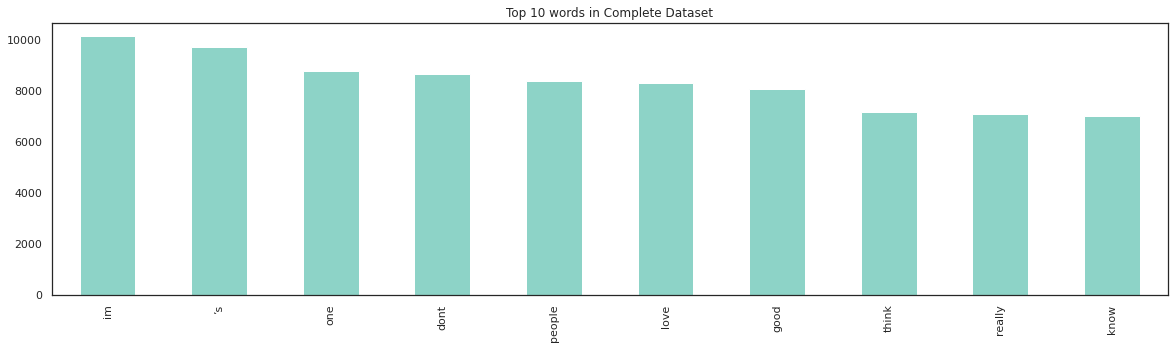

In [ ]:
df["text"].str.split(expand=True).stack().value_counts().head(10).plot(kind="bar",
                                                                       title ="Top 10 words in Complete Dataset",
                                                                       figsize=(20,5),
                                                                       colormap='Set3',
                                                                       rot=90)

## Latent Dirichlet Allocation:

In [ ]:
n_topics = 5

In [ ]:
cv = CountVectorizer(max_df = 0.90, min_df= 2, stop_words="english")
cv_fit = cv.fit_transform(df["text"])

In [ ]:
lda = LatentDirichletAllocation(n_components= n_topics, random_state=1).fit(cv_fit)

# lda_topic_matrix = lda.fit_transform(cv_fit)

In [ ]:
lda_topic_matrix = lda.fit_transform(cv_fit)

In [ ]:
print("Shape of the Latent Dirichlet Allocation component:", lda.components_.shape)

Shape of the Latent Dirichlet Allocation component: (5, 35433)


In [ ]:
feature = cv.get_feature_names()
for ind, topic in enumerate(lda.components_):
  print('Top 10 words in topic {}'.format(ind+1))
  print('-'*len('Top 10 words in topic {}'.format(ind)))
  top_ten = topic.argsort()[-10:]
  print([feature[i] for i in top_ten])
  print()
  print()

Top 10 words in topic 1
-----------------------
['sorry', 'time', 'make', 'sure', 'know', 'really', 'im', 'think', 'people', 'dont']


Top 10 words in topic 2
-----------------------
['time', 'best', 'new', 'shit', 'happy', 'day', 'great', 'thats', 'got', 'oh']


Top 10 words in topic 3
-----------------------
['youre', 'thanks', 'hope', 'better', 'sorry', 'glad', 'love', 'thank', 'good', 'im']


Top 10 words in topic 4
-----------------------
['guy', 'fuck', 'hard', 'really', 'think', 'don', 'know', 'lol', 'post', 'thanks']


Top 10 words in topic 5
-----------------------
['seen', 'dont', 'thing', 'cool', 'man', 'people', 'hate', 'say', 'ive', 'love']




In [ ]:
def get_keys(topic_matrix):
  '''
  returns an integer list of predicted topic 
  categories for a given topic matrix
  '''
  keys = topic_matrix.argmax(axis=1).tolist()
  return keys

def keys_to_counts(keys):
  '''
  returns a tuple of topic categories and their 
  accompanying magnitudes for a given list of keys
  '''
  count_pairs = Counter(keys).items()
  categories = [pair[0] for pair in count_pairs]
  counts = [pair[1] for pair in count_pairs]
  return (categories, counts)

In [ ]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [ ]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
  '''
  returns a list of n_topic strings, where each string contains the n most common 
  words in a predicted category, in order
  '''
  top_word_indices = []
  for topic in range(n_topics):
    temp_vector_sum = 0
    for i in range(len(keys)):
      if keys[i] == topic:
        temp_vector_sum += document_term_matrix[i]
    temp_vector_sum = temp_vector_sum.toarray()
    top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
    top_word_indices.append(top_n_word_indices)   
  top_words = []
  for topic in top_word_indices:
    topic_words = []
    for index in topic:
      temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
      temp_word_vector[:,index] = 1
      the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
      topic_words.append(the_word)#.encode('ascii').decode('utf-8'))
    top_words.append(" ".join(topic_words))         
  return top_words

In [ ]:
top_n_words_lda = get_top_n_words(10, lda_keys, cv_fit, cv)

for i in range(len(top_n_words_lda)):
  print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  dont people im think really know sure time make bad
Topic 2:  oh thats got great day happy time good want know
Topic 3:  im good thank love thanks hope time sorry better really
Topic 4:  thanks lol know really think don post people way yeah
Topic 5:  love people dont say ive thing man good hate didnt


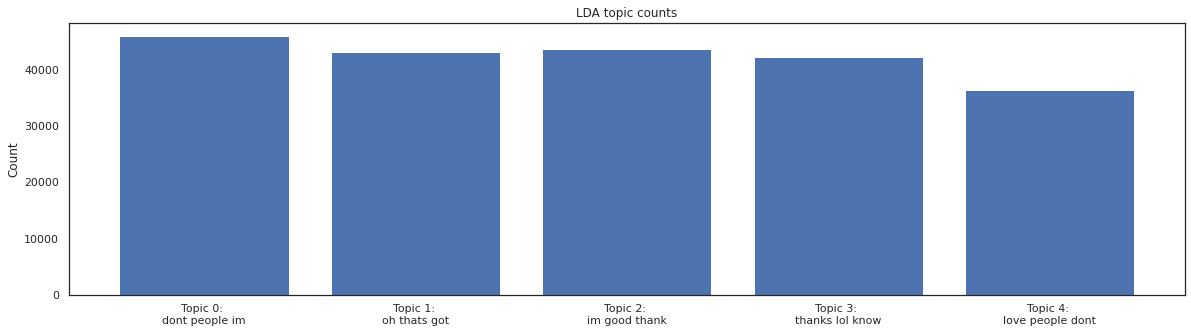

In [ ]:
top_3_words = get_top_n_words(3, lda_keys, cv_fit, cv)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Count');

In [ ]:
import gensim
from gensim import corpora
bigram = gensim.models.Phrases(df["text"], min_count=5, threshold=100) 
bigram_mod = gensim.models.phrases.Phraser(bigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(df["text"])# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_words_bigrams)# Converting list of documents (corpus) 
# into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(text) for text in data_words_bigrams]# Build the LDA model
from gensim.models import LdaModel
lda_model = LdaModel(corpus=doc_term_matrix,id2word=dictionary,num_topics=5,random_state=100,
                     passes=10,alpha=0.31,eta=0.9099999999999999)
lda_model.print_topics()

[(0,
  '0.144*"i" + 0.139*"n" + 0.124*" " + 0.105*"g" + 0.082*"t" + 0.049*"s" + 0.049*"o" + 0.046*"a" + 0.043*"u" + 0.039*"c"'),
 (1,
  '0.153*" " + 0.133*"o" + 0.129*"u" + 0.086*"s" + 0.081*"l" + 0.070*"b" + 0.062*"r" + 0.061*"d" + 0.049*"e" + 0.045*"y"'),
 (2,
  '0.195*"e" + 0.139*" " + 0.071*"o" + 0.067*"s" + 0.067*"r" + 0.065*"n" + 0.057*"i" + 0.055*"d" + 0.051*"t" + 0.043*"l"'),
 (3,
  '0.179*" " + 0.154*"h" + 0.148*"o" + 0.120*"w" + 0.085*"t" + 0.072*"k" + 0.071*"n" + 0.066*"a" + 0.038*"g" + 0.029*"s"'),
 (4,
  '0.144*" " + 0.131*"a" + 0.117*"e" + 0.093*"l" + 0.071*"t" + 0.061*"y" + 0.060*"s" + 0.059*"r" + 0.048*"h" + 0.041*"c"')]

In [ ]:
# Compute Perplexity, a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda_c_v = coherence_model_lda.get_coherence()
print('\nCoherence Score using c_v: ', coherence_lda_c_v)# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lda_u_mass = coherence_model_lda.get_coherence()
print('\nCoherence Score using u_mass: ', coherence_lda_u_mass)


Perplexity:  -3.0583937130237886

Coherence Score using c_v:  0.554385220111729

Coherence Score using u_mass:  -1.3216795624613664


In [ ]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, cv_fit, cv, mds='tsne')
dash

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      150.222153  -72.269554       1        1  22.092319
2       51.163364 -159.968018       2        1  20.172930
1      -73.144554   21.523815       3        1  20.101191
3      -66.410133 -110.606438       4        1  19.843625
4       54.417324   12.443444       5        1  17.789936, topic_info=         Term         Freq        Total Category  logprob  loglift
18051    love  8174.000000  8174.000000  Default  30.0000  30.0000
14977      im  9836.000000  9836.000000  Default  29.0000  29.0000
30721   thank  4201.000000  4201.000000  Default  28.0000  28.0000
8833     dont  8407.000000  8407.000000  Default  27.0000  27.0000
12775    good  7852.000000  7852.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
31086  things   638.473319  2167.845649   Topic5  -5.8131   0.5041
10901    feel   740.126673  3591.862466   Topic5  -5.6653   0.1469
16829    know   878.403761  6828.585812   Topic5  -5.4940  -0.3242
2465      bad   711.642393  3912.476188   Topic5  -5.7046   0.0222
23717  pretty   659.167214  3021.966351   Topic5  -5.7812   0.2039

[405 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
142        1  0.822285  absolutely
142        2  0.006037  absolutely
142        3  0.167838  absolutely
142        4  0.003622  absolutely
358        1  0.174037    actually
...      ...       ...         ...
35252      1  0.249029       youre
35252      2  0.415809       youre
35252      3  0.083517       youre
35252      4  0.113726       youre
35252      5  0.137842       youre

[846 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4, 5])

## Latent Semantic Analysis:

In [ ]:
lsa = TruncatedSVD(n_components= n_topics, random_state=1).fit(cv_fit)
lsa_topic_matrix = lsa.fit_transform(cv_fit)

In [ ]:
print("Shape of the Latent Semantic Analysis component:", lsa.components_.shape)

Shape of the Latent Semantic Analysis component: (5, 35433)


In [ ]:
for ind, topic in enumerate(lsa.components_):
  print('Top 10 words in topic {}'.format(ind+1))
  print('-'*len('Top 10 words in topic {}'.format(ind)))
  top_ten = topic.argsort()[-10:]
  print([feature[i] for i in top_ten])
  print()
  print()

Top 10 words in topic 1
-----------------------
['time', 'thats', 'love', 'really', 'think', 'good', 'know', 'people', 'dont', 'im']


Top 10 words in topic 2
-----------------------
['saying', 'surprised', 'curious', 'gonna', 'happy', 'going', 'sure', 'glad', 'sorry', 'im']


Top 10 words in topic 3
-----------------------
['got', 'oh', 'man', 'thats', 'luck', 'thanks', 'time', 'really', 'good', 'love']


Top 10 words in topic 4
-----------------------
['stupid', 'believe', 'don', 'make', 'sure', 'lot', 'hate', 'im', 'love', 'people']


Top 10 words in topic 5
-----------------------
['youre', 'got', 'make', 'bad', 'time', 'thats', 'really', 'luck', 'people', 'good']




In [ ]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [ ]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, cv_fit, cv)

for i in range(len(top_n_words_lsa)):
  print("Topic {}: \n".format(i+1), top_n_words_lsa[i])

Topic 1: 
 dont know think really thats time lol thanks oh got
Topic 2: 
 im glad sorry sure going happy youre thats gonna lol
Topic 3: 
 love good really id man thanks great oh hope hate
Topic 4: 
 people think love really time want make don hate need
Topic 5: 
 good luck people bad thats job thing pretty time youre


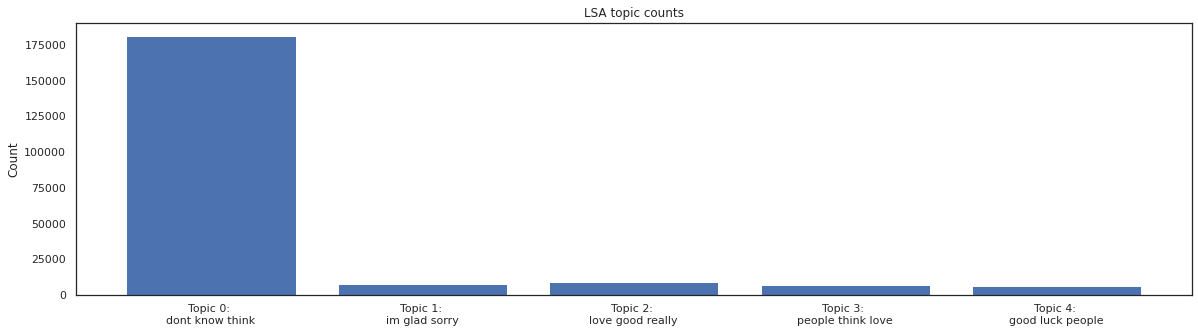

In [ ]:
top_3_words = get_top_n_words(3, lsa_keys, cv_fit, cv)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Count');
ax.set_title('LSA topic counts');
plt.show()

In [ ]:
tsne_lsa_model = TSNE(n_components=2)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

In [ ]:
colormap = np.array([
  "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
  "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
  "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
  "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [ ]:
def get_mean_topic_vectors(keys, two_dim_vectors):
  '''
  returns a list of centroid vectors from each predicted topic category
  '''
  mean_topic_vectors = []
  for t in range(n_topics):
    articles_in_that_topic = []
    for i in range(len(keys)):
      if keys[i] == t:
        articles_in_that_topic.append(two_dim_vectors[i])    
    
    articles_in_that_topic = np.vstack(articles_in_that_topic)
    mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
    mean_topic_vectors.append(mean_article_in_that_topic)
  return mean_topic_vectors

In [ ]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, cv_fit, cv)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
  label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                text=top_3_words_lsa[t], text_color=colormap[t])
  plot.add_layout(label)
    
show(plot)

In [ ]:
from gensim.models import LsiModel
lsi_model = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
lsi_model.print_topics(num_topics=10,num_words=10)

In [ ]:
# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lsi_c_v = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using c_v: ', coherence_lsi_c_v)# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lsi_u_mass = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using u_mass: ', coherence_lsi_u_mass)


Coherence Score for LSI using c_v:  0.45368195927079846

Coherence Score for LSI using u_mass:  -4.742047854934737


## Non-Negative Matrix Factorization:

In [ ]:
nmf = NMF(n_components= n_topics, random_state=1).fit(cv_fit)
nmf_topic_matrix = nmf.fit_transform(cv_fit)

In [ ]:
print("Shape of the Non-Negative Matrix Factorization component:", nmf.components_.shape)

In [ ]:
for ind, topic in enumerate(nmf.components_):
  print('Top 10 words in topic {}'.format(ind+1))
  print('-'*len('Top 10 words in topic {}'.format(ind)))
  top_ten = topic.argsort()[-10:]
  print([feature[i] for i in top_ten])
  print()
  print()

Top 10 words in topic 1
-----------------------
['didnt', 'don', 'youre', 'right', 'thats', 'really', 'want', 'think', 'know', 'dont']


Top 10 words in topic 2
-----------------------
['thanks', 'happy', 'lol', 'youre', 'thats', 'going', 'sure', 'glad', 'sorry', 'im']


Top 10 words in topic 3
-----------------------
['man', 'hope', 'got', 'bad', 'thanks', 'time', 'luck', 'thats', 'really', 'good']


Top 10 words in topic 4
-----------------------
['need', 'feel', 'yeah', 'don', 'want', 'way', 'make', 'really', 'time', 'people']


Top 10 words in topic 5
-----------------------
['say', 'work', 'lol', 'thanks', 'great', 'hate', 'man', 'id', 'really', 'love']




In [ ]:
nmf_keys = get_keys(nmf_topic_matrix)
nmf_categories, nmf_counts = keys_to_counts(nmf_keys)

In [ ]:
top_n_words_nmf = get_top_n_words(10, nmf_keys, cv_fit, cv)

for i in range(len(top_n_words_nmf)):
  print("Topic {}: \n".format(i+1), top_n_words_nmf[i])

Topic 1: 
 dont think know want right didnt say don let said
Topic 2: 
 im sorry going sure glad youre happy gonna ive getting
Topic 3: 
 good really thats time thanks oh got lol thank bad
Topic 4: 
 people make yeah way don need hate mean believe lot
Topic 5: 
 love id work cool fucking wait gotta favorite really guys


In [ ]:
top_3_words = get_top_n_words(3, nmf_keys, cv_fit, cv)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in nmf_categories]

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(nmf_categories, nmf_counts);
ax.set_xticks(nmf_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Count');
ax.set_title('NMF topic counts');
plt.show()

In [ ]:
# # from gensim.models import 
# from gensim.models import Nmf
# # from gensim.models import Nmf
# Nmf_model = Nmf(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
# Nmf_model.print_topics(num_topics=10,num_words=10)

In [ ]:
# # Compute Coherence Score for Nmf model
# coherence_model_Nmf = CoherenceModel(model=Nmf_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
# coherence_Nmf_c_v = coherence_model_Nmf.get_coherence()
# print('\nCoherence Score for Nmf using c_v: ', coherence_Nmf_c_v)# Compute Coherence Score for Nmf model
# coherence_model_Nmf = CoherenceModel(model=Nmf_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
# coherence_Nmf_u_mass = coherence_model_Nmf.get_coherence()
# print('\nCoherence Score for Nmf using u_mass: ', coherence_Nmf_u_mass)

## Sentiment Analysis:

In [ ]:
def sentiment_analysis(feedback):
  polarity = 0

  analysis = TextBlob(feedback)
  polarity = polarity + analysis.sentiment.polarity

  if (analysis.sentiment.polarity == 0.00):
    sent = "neutral"

  elif (analysis.sentiment.polarity > 0.00):
    sent = "positive" 

  elif (analysis.sentiment.polarity < 0.00):
    sent = "negative"

  return([sent,polarity])


In [ ]:
data = copy.deepcopy(df)
data = data[["text"]]

ls= data["text"].apply(lambda x: sentiment_analysis(x))


data["sentiment"]= [ i[0] for i in ls]
data["polarity"]= [ i[1] for i in ls]
data.head()
data.sample(6)

text sentiment  polarity
0                                          game hurt  negative -0.400000
1   sexuality shouldn’t grouping category makes d...   neutral  0.000000
2                            right dont care fuck em  negative -0.057143
3                                    man love reddit  positive  0.500000
4                               nowhere near falcon   positive  0.100000

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(y = data["sentiment"], palette="Set1")
plt.title("Sentiments")
plt.show()


In [ ]:
data["polarity"].plot(kind="hist", figsize=(20,5), title="Sentiment Polarity Distribution")